In [1]:

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_boston
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, LeaveOneOut, cross_val_score

# Set random seed
np.random.seed(42)

# Display plots inline and change plot resolution to retina
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Set Seaborn aesthetic parameters to defaults
sns.set()

Given the Boston dataset (load_boston), do a program using the library sklearn, that divides the dataset in two parts (one for training and another one for testing) and train the algorithm of regression to predict the housing prices given the missing values. 

In [2]:
dataset = load_boston()
#print(dataset["DESCR"])

df_boston = pd.DataFrame(data=dataset['data'], columns=dataset.feature_names)
df_boston['PRICE'] = dataset.target

In [3]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
X = df_boston.drop('PRICE', axis = 1)
y = df_boston['PRICE']

In [5]:
# Should we normalize?
#scaled = StandardScaler().fit_transform(X)
#X = pd.DataFrame(scaled, columns=dataset.feature_names)
#X.head()

In [6]:
(X_train, X_test, y_train, y_test) = model_selection.train_test_split(X, y, train_size=0.8, random_state=1)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

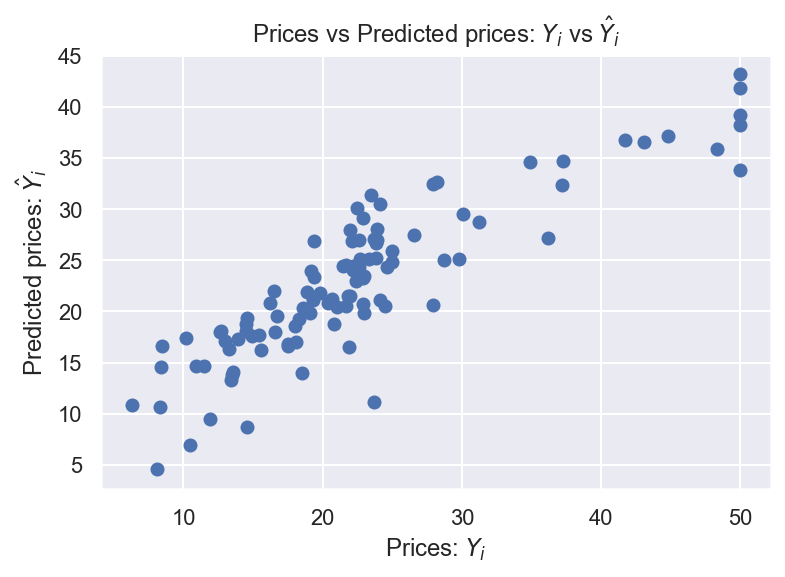

In [7]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

pred = lm.predict(X_test)

# visualization (from https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef)
plt.scatter(y_test, pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [8]:
from sklearn.metrics import mean_squared_error
mean_squared_error = mean_squared_error(y_test, pred)
mean_squared_error

23.38083648027037

In [9]:
cross_val_score(lm, X_test, y_test, cv=10)


array([-2.05635826,  0.73934063,  0.73370346,  0.76230972,  0.90383238,
        0.81635414,  0.44420142,  0.40864807,  0.92159469,  0.88990949])